In [1]:
import os
from os import listdir
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



import glob
import PIL
import random

from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE, SequentialFeatureSelector

In [2]:
dicom_data = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Data Science Tools\csv\dicom_info.csv")
image_dir = r"C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Data Science Tools\jpeg"

In [3]:
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [4]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [5]:
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [6]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()

0     C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
3     C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
6     C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
7     C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
10    C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
Name: image_path, dtype: object

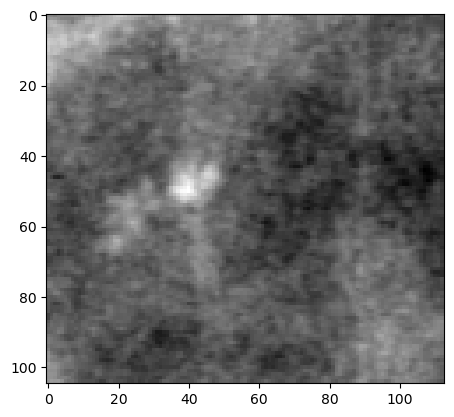

In [7]:
for file in cropped_images[0:10]:
    cropped_images_show = PIL.Image.open(file)
    gray_img= cropped_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [8]:
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [9]:
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.head()

1     C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
2     C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
11    C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
12    C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
15    C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
Name: image_path, dtype: object

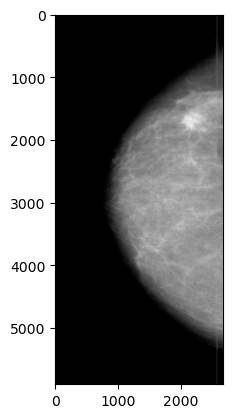

In [10]:
for file  in full_mammogram_images[0:10]:
    full_mammogram_images_show = PIL.Image.open(file)
    gray_img= full_mammogram_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [11]:
ROI_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [12]:
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

5     C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
8     C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
9     C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
14    C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
20    C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Da...
Name: image_path, dtype: object

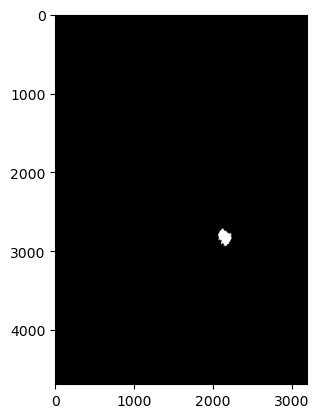

In [13]:
for file  in ROI_mask_images[0:10]:
    ROI_mask_images_show = PIL.Image.open(file)
    gray_img= ROI_mask_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [14]:
calc_case_df = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Data Science Tools\csv\calc_case_description_test_set.csv")
calc_case_df.head(5)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [15]:
mass_case_df = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Data Science Tools\csv\mass_case_description_test_set.csv")
mass_case_df.head(5)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [16]:
dicom_cleaned_data = dicom_data.copy()
dicom_cleaned_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [17]:
dicom_cleaned_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                                                'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True)

In [18]:
dicom_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [19]:
dicom_cleaned_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

In [20]:
dicom_cleaned_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)

In [21]:
dicom_cleaned_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)

In [22]:
dicom_cleaned_data.isna().sum()

file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

In [23]:
Data_cleaning_1 = calc_case_df.copy()
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'calc_type'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'calc_distribution'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'image_view'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'breast_density'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')
Data_cleaning_1.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality id              0
abnormality_type            0
calc_type                   4
calc_distribution          63
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [24]:
Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_1.isna().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [25]:
Data_cleaning_2 = mass_case_df.copy()
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')
Data_cleaning_2.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality id              0
abnormality_type            0
mass_shape                  0
mass_margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [26]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_2.isna().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [27]:
mass_train = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Data Science Tools\csv\mass_case_description_train_set.csv")
mass_test = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Data Science Tools\csv\mass_case_description_test_set.csv")
mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


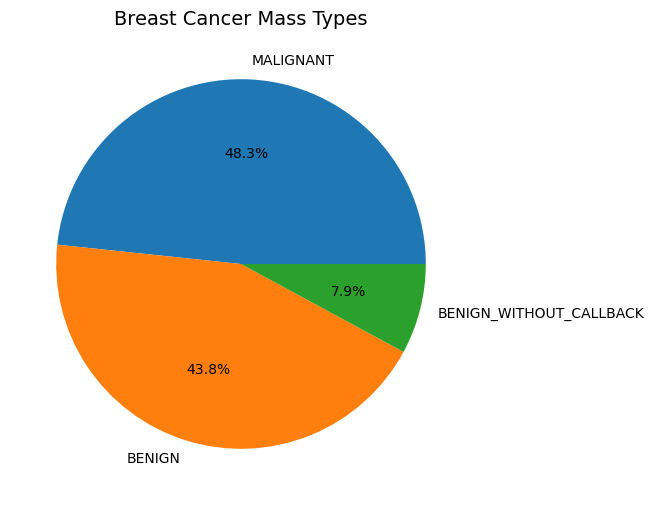

In [28]:
# pathology distributions
value = mass_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=14)
plt.show()

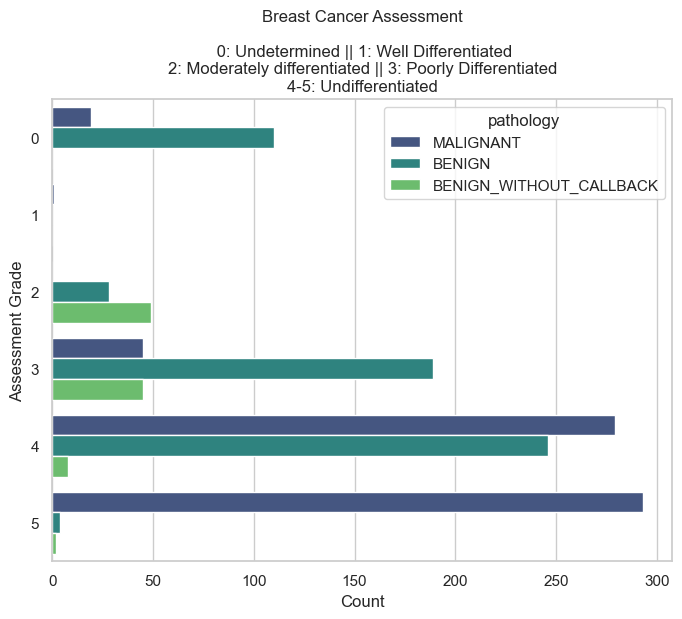

In [29]:
# examine breast assessment types
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))

sns.countplot(data=mass_train, y='assessment', hue='pathology', palette='viridis')
plt.title('Breast Cancer Assessment\n\n 0: Undetermined || 1: Well Differentiated\n2: Moderately differentiated || 3: Poorly Differentiated\n4-5: Undifferentiated',
          fontsize=12)
plt.xlabel('Count')
plt.ylabel('Assessment Grade')
plt.show()

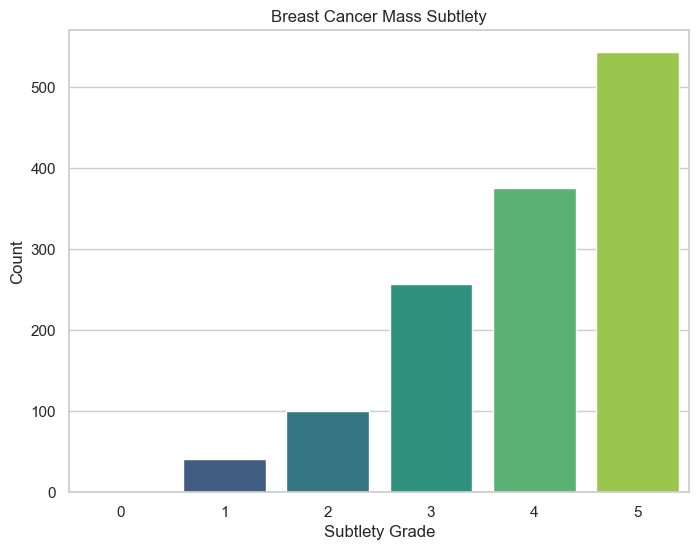

In [30]:
# examine cancer subtlety
plt.figure(figsize=(8,6))
sns.countplot(data=mass_train, x='subtlety', palette='viridis')
plt.title('Breast Cancer Mass Subtlety', fontsize=12)
plt.xlabel('Subtlety Grade')
plt.ylabel('Count')
plt.show()

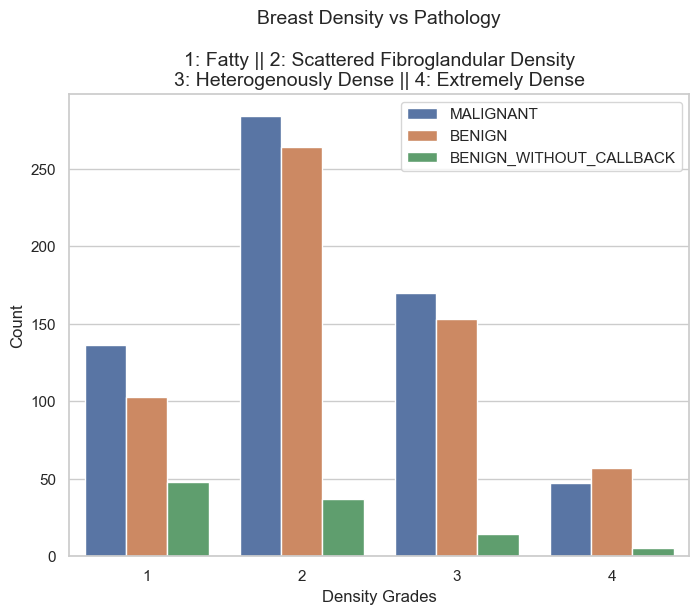

In [31]:
# breast density against pathology
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))

sns.countplot(data=mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: Fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()
plt.show()

In [32]:
# Prepare the data for CNN
image_paths = cropped_images.to_list() + full_mammogram_images.to_list() + ROI_mask_images.to_list()
labels = ['cropped images'] * len(cropped_images) + ['full mammogram images'] * len(full_mammogram_images) + ['ROI mask images'] * len(ROI_mask_images)

In [33]:
# Convert labels to numeric values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
print(label_encoder)
print(labels_encoded)

LabelEncoder()
[1 1 1 ... 0 0 0]


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels_encoded, test_size=0.2, random_state=42)

In [35]:
# Load and preprocess images for CNN
def load_and_preprocess_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (224, 224))
    img = img.astype('float32') / 255.0
    return img

X_train_cnn = np.array([load_and_preprocess_image(path) for path in X_train])
X_test_cnn = np.array([load_and_preprocess_image(path) for path in X_test])
print(X_train_cnn)
print(X_test_cnn)

[[[0.36862746 0.38039216 0.41960785 ... 0.45490196 0.42745098 0.4509804 ]
  [0.4        0.38039216 0.41568628 ... 0.48235294 0.46666667 0.47058824]
  [0.40784314 0.39607844 0.3882353  ... 0.5176471  0.49803922 0.49019608]
  ...
  [0.44313726 0.40784314 0.40784314 ... 0.29411766 0.32156864 0.31764707]
  [0.4117647  0.40392157 0.38431373 ... 0.29411766 0.27450982 0.2627451 ]
  [0.4392157  0.40392157 0.3764706  ... 0.29411766 0.28627452 0.27058825]]

 [[0.8666667  0.84705883 0.7882353  ... 1.         1.         1.        ]
  [0.6509804  0.59607846 0.04705882 ... 0.9098039  1.         1.        ]
  [0.53333336 0.14509805 0.         ... 0.75686276 0.99607843 1.        ]
  ...
  [0.88235295 0.8627451  0.81960785 ... 0.36862746 0.32941177 1.        ]
  [0.89411765 0.8784314  0.85882354 ... 0.79607844 1.         1.        ]
  [0.9019608  0.8901961  0.88235295 ... 0.4509804  1.         1.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.      

In [36]:
# Convert labels to one-hot encoded vectors
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)
print(y_train_cnn)
print(y_test_cnn)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [37]:
# Build the CNN model
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(3, activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# Train the CNN model
model_cnn.fit(X_train_cnn, y_train_cnn, batch_size=32, epochs=7, validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/7
242/242 [==============================] - 347s 1s/step - loss: 0.0702 - accuracy: 0.9815 - val_loss: 0.0181 - val_accuracy: 0.9938
Epoch 2/7
242/242 [==============================] - 326s 1s/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0050 - val_accuracy: 0.9974
Epoch 3/7
242/242 [==============================] - 323s 1s/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 0.0051 - val_accuracy: 0.9984
Epoch 4/7
242/242 [==============================] - 324s 1s/step - loss: 1.2248e-04 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 0.9984
Epoch 5/7
242/242 [==============================] - 321s 1s/step - loss: 7.0788e-05 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9984
Epoch 6/7
242/242 [==============================] - 320s 1s/step - loss: 3.1346e-05 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9984
Epoch 7/7
242/242 [==============================] - 277s 1s/step - loss: 1.8894e-05 - accuracy: 1.0000 - val_loss: 0.0076 - val_accurac

In [39]:
# Evaluate the CNN model
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
classification_report_cnn = classification_report(y_test, y_pred_cnn)
classification_report_cnn_1 = classification_report(y_test, y_pred_cnn, output_dict=True)

print('CNN Accuracy:', accuracy_cnn)
print('CNN Classification Report:')
print(classification_report_cnn)
print('CNN Classification Report Dictionary:')
print(classification_report_cnn_1)

61/61 [==============================] - 13s 146ms/step
CNN Accuracy: 0.9984496124031008
CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       640
           1       1.00      1.00      1.00       721
           2       0.99      1.00      1.00       574

    accuracy                           1.00      1935
   macro avg       1.00      1.00      1.00      1935
weighted avg       1.00      1.00      1.00      1935

CNN Classification Report Dictionary:
{'0': {'precision': 1.0, 'recall': 0.9984375, 'f1-score': 0.9992181391712275, 'support': 640}, '1': {'precision': 1.0, 'recall': 0.9972260748959778, 'f1-score': 0.9986111111111111, 'support': 721}, '2': {'precision': 0.9948006932409013, 'recall': 1.0, 'f1-score': 0.9973935708079931, 'support': 574}, 'accuracy': 0.9984496124031008, 'macro avg': {'precision': 0.9982668977469671, 'recall': 0.9985545249653259, 'f1-score': 0.9984076070301106, 'support': 1935}, 'weig

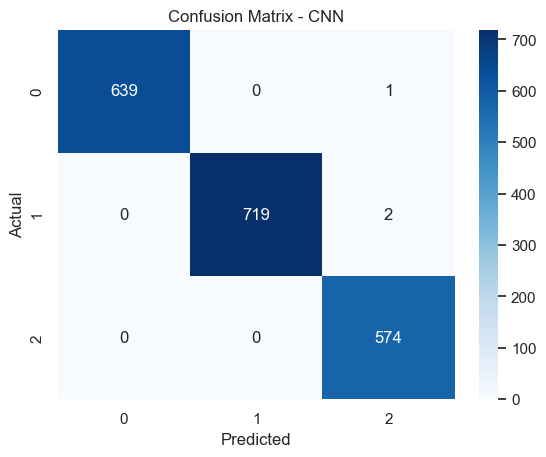

In [40]:
# Confusion Matrix for CNN
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(conf_matrix_cnn, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN')
plt.show()

In [41]:
# Prepare the data for SVM
X_train_svm = np.array([load_and_preprocess_image(path).flatten() for path in X_train])
X_test_svm = np.array([load_and_preprocess_image(path).flatten() for path in X_test])
print(X_train_svm)
print(X_test_svm)

[[0.36862746 0.38039216 0.41960785 ... 0.29411766 0.28627452 0.27058825]
 [0.8666667  0.84705883 0.7882353  ... 0.4509804  1.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.8392157  0.8352941  0.8117647  ... 0.91764706 0.8        1.        ]
 [0.9019608  0.88235295 0.88235295 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.39607844 0.38431373 0.39215687 ... 0.08235294 0.09803922 0.08627451]
 [0.10588235 0.06666667 0.07450981 ... 0.27058825 0.25882354 0.23921569]
 ...
 [0.5137255  0.5137255  0.50980395 ... 0.25490198 0.27058825 0.27450982]
 [0.03529412 0.02352941 0.01960784 ... 0.8039216  0.8117647  0.8156863 ]
 [0.41568628 0.47058824 0.44313726 ... 0.3764706  0.39215687 0.39607844]]


In [42]:
# Build and train the SVM model
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_svm, y_train)

SVC(kernel='linear')

In [43]:
# Predict using the SVM model
y_pred_svm = model_svm.predict(X_test_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
classification_report_svm_1 = classification_report(y_test, y_pred_svm, output_dict=True)

print('SVM Accuracy:', accuracy_svm)
print('SVM Classification Report:')
print(classification_report_svm)
print('SVM Classification Report Dictionary:')
print(classification_report_svm_1)

SVM Accuracy: 0.9963824289405685
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       640
           1       1.00      1.00      1.00       721
           2       0.99      1.00      0.99       574

    accuracy                           1.00      1935
   macro avg       1.00      1.00      1.00      1935
weighted avg       1.00      1.00      1.00      1935

SVM Classification Report Dictionary:
{'0': {'precision': 1.0, 'recall': 0.9953125, 'f1-score': 0.9976507439310885, 'support': 640}, '1': {'precision': 0.9986091794158554, 'recall': 0.9958391123439667, 'f1-score': 0.9972222222222222, 'support': 721}, '2': {'precision': 0.9896373056994818, 'recall': 0.9982578397212544, 'f1-score': 0.9939288811795316, 'support': 574}, 'accuracy': 0.9963824289405685, 'macro avg': {'precision': 0.9960821617051124, 'recall': 0.9964698173550737, 'f1-score': 0.9962672824442808, 'support': 1935}, 'weighted avg': {'precision': 0

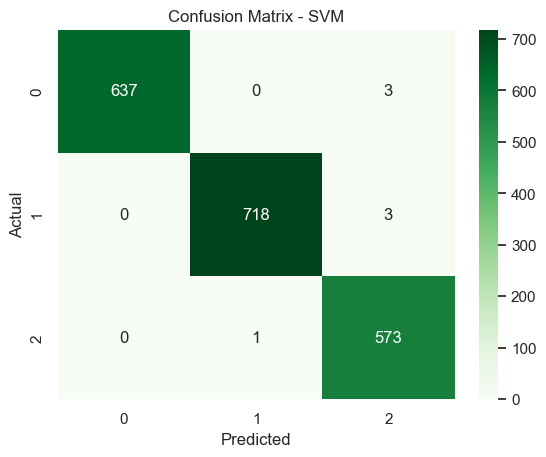

In [44]:
# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

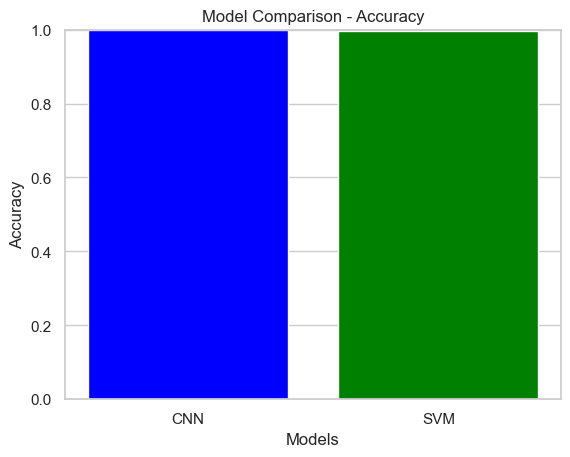

In [45]:
# Bar plot for model comparison
models = ['CNN', 'SVM']
accuracies = [accuracy_cnn, accuracy_svm]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy range
plt.show()

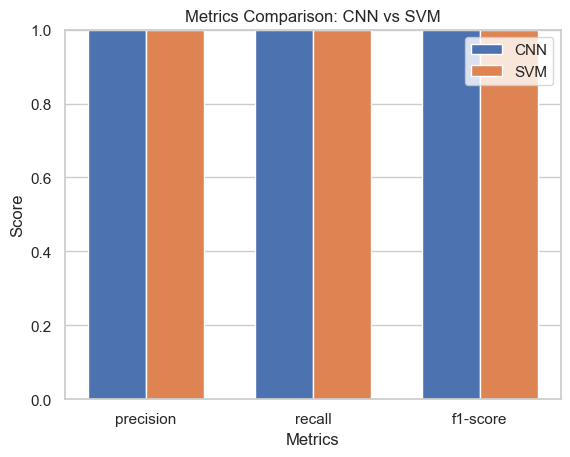

In [46]:
# Extract precision, recall, and F1-score values from classification report strings
def extract_scores(report):
    scores = re.findall(r"\d+\.\d+", report)
    return [float(score) for score in scores]

cnn_scores = extract_scores(classification_report_cnn)[:3]  # Consider only the first 3 scores
svm_scores = extract_scores(classification_report_svm)[:3]  # Consider only the first 3 scores

metrics = ['precision', 'recall', 'f1-score']
bar_width = 0.35
index = np.arange(len(metrics))

plt.bar(index, cnn_scores, bar_width, label='CNN')
plt.bar(index + bar_width, svm_scores, bar_width, label='SVM')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Metrics Comparison: CNN vs SVM')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.ylim([0, 1])
plt.show()

In [47]:
# Model Selection: Dummy Classifier
# Build and train the Dummy Classifier model
model_dummy = DummyClassifier(strategy='most_frequent')
model_dummy.fit(X_train_svm, y_train)

DummyClassifier(strategy='most_frequent')

In [48]:
# Predict using the Dummy Classifier model
y_pred_dummy = model_dummy.predict(X_test_svm)
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
classification_report_dummy = classification_report(y_test, y_pred_dummy)
classification_report_dummy_1 = classification_report(y_test, y_pred_dummy, output_dict=True)

print('Dummy Classifier Accuracy:', accuracy_dummy)
print('Dummy Classifier Classification Report:')
print(classification_report_dummy)
print('Dummy Classifier Classification Report Dictionary:')
print(classification_report_dummy_1)

Dummy Classifier Accuracy: 0.37260981912144703
Dummy Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       640
           1       0.37      1.00      0.54       721
           2       0.00      0.00      0.00       574

    accuracy                           0.37      1935
   macro avg       0.12      0.33      0.18      1935
weighted avg       0.14      0.37      0.20      1935

Dummy Classifier Classification Report Dictionary:
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 640}, '1': {'precision': 0.37260981912144703, 'recall': 1.0, 'f1-score': 0.5429216867469879, 'support': 721}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 574}, 'accuracy': 0.37260981912144703, 'macro avg': {'precision': 0.12420327304048234, 'recall': 0.3333333333333333, 'f1-score': 0.18097389558232932, 'support': 1935}, 'weighted avg': {'precision': 0.13883807730571748, 'recall': 0.37260

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\

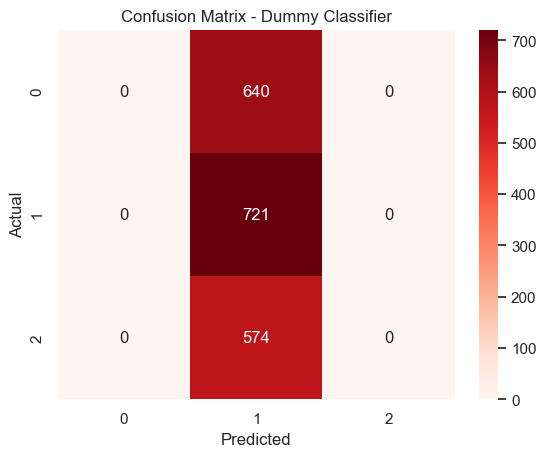

In [49]:
# Confusion Matrix for DCM
conf_matrix_DCM = confusion_matrix(y_test, y_pred_dummy)
sns.heatmap(conf_matrix_DCM, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Dummy Classifier')
plt.show()

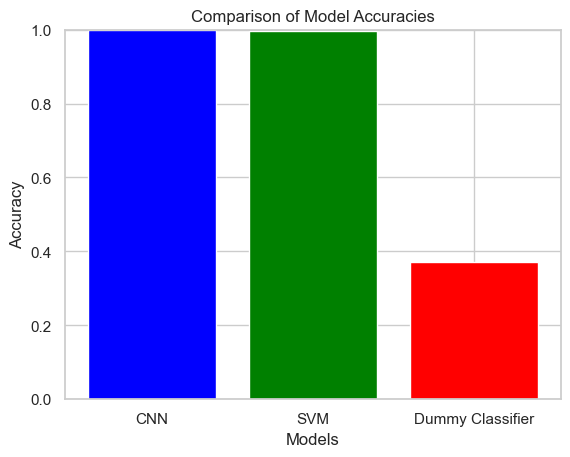

In [50]:
# Graph to compare accuracy of CNN, SVM, and Dummy Classifier
models = ['CNN', 'SVM', 'Dummy Classifier']
accuracies = [accuracy_cnn, accuracy_svm, accuracy_dummy]
colors = ['blue', 'green', 'red']

plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


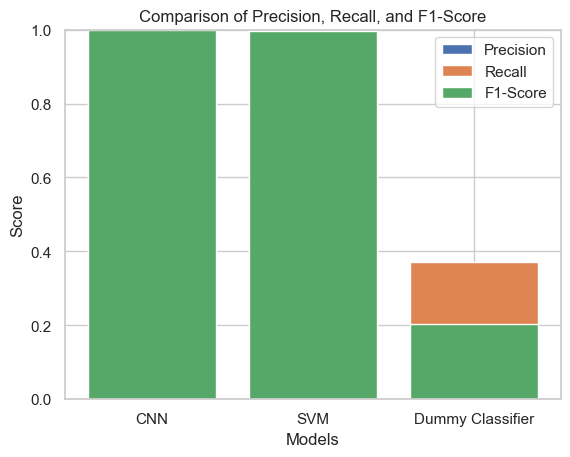

In [51]:
# Graph to compare precision, recall, and f1-score of CNN, SVM, and Dummy Classifier
precision_scores = [precision_score(y_test, y_pred_cnn, average='weighted'),
                    precision_score(y_test, y_pred_svm, average='weighted'),
                    precision_score(y_test, y_pred_dummy, average='weighted')]
recall_scores = [recall_score(y_test, y_pred_cnn, average='weighted'),
                 recall_score(y_test, y_pred_svm, average='weighted'),
                 recall_score(y_test, y_pred_dummy, average='weighted')]
f1_scores = [f1_score(y_test, y_pred_cnn, average='weighted'),
             f1_score(y_test, y_pred_svm, average='weighted'),
             f1_score(y_test, y_pred_dummy, average='weighted')]

plt.bar(models, precision_scores, label='Precision')
plt.bar(models, recall_scores, label='Recall')
plt.bar(models, f1_scores, label='F1-Score')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Precision, Recall, and F1-Score')
plt.legend()
plt.ylim([0, 1])
plt.show()

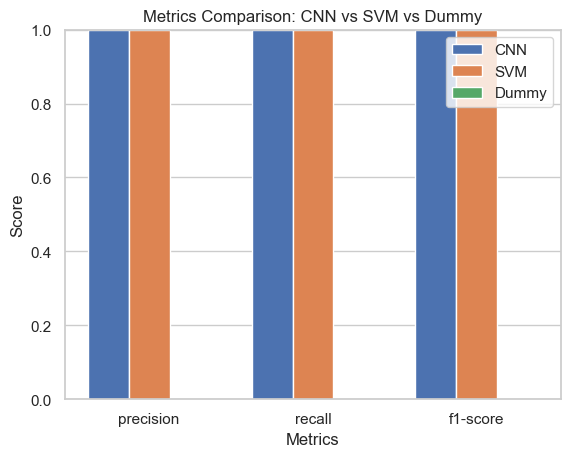

In [52]:
# Extract precision, recall, and F1-score values from classification report strings
def extract_scores(report):
    scores = re.findall(r"\d+\.\d+", report)
    return [float(score) for score in scores]

cnn_scores = extract_scores(classification_report_cnn)[:3]  # Consider only the first 3 scores
svm_scores = extract_scores(classification_report_svm)[:3]  # Consider only the first 3 scores
dummy_scores = extract_scores(classification_report_dummy)[:3]  # Consider only the first 3 scores

metrics = ['precision', 'recall', 'f1-score']
bar_width = 0.25
index = np.arange(len(metrics))

plt.bar(index, cnn_scores, bar_width, label='CNN')
plt.bar(index + bar_width, svm_scores, bar_width, label='SVM')
plt.bar(index + 2 * bar_width, dummy_scores, bar_width, label='Dummy')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Metrics Comparison: CNN vs SVM vs Dummy')
plt.xticks(index + bar_width, metrics)
plt.legend()
plt.ylim([0, 1])
plt.show()

In [59]:
#fine tunig algorithm
# Assuming you have a pre-trained model loaded into pretrained_model 
pretrained_model = model_cnn  # model_cnn with the highest accuracy

# Remove the dense layers from the pre-trained model
pretrained_model.layers.pop()
pretrained_model.layers.pop()

# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Build your new model on top of the pre-trained model
fine_tuned_model = Sequential()
fine_tuned_model.add(pretrained_model)
fine_tuned_model.add(Dense(128, activation='relu'))
fine_tuned_model.add(Dense(3, activation='softmax'))

# Compile the fine-tuned model
fine_tuned_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/5
242/242 [==============================] - 65s 249ms/step - loss: 0.3166 - accuracy: 0.9696 - val_loss: 0.0346 - val_accuracy: 0.9984
Epoch 2/5
242/242 [==============================] - 54s 224ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9984
Epoch 3/5
242/242 [==============================] - 53s 218ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9984
Epoch 4/5
242/242 [==============================] - 57s 237ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 0.9984
Epoch 5/5
61/61 [==============================] - 13s 164ms/step


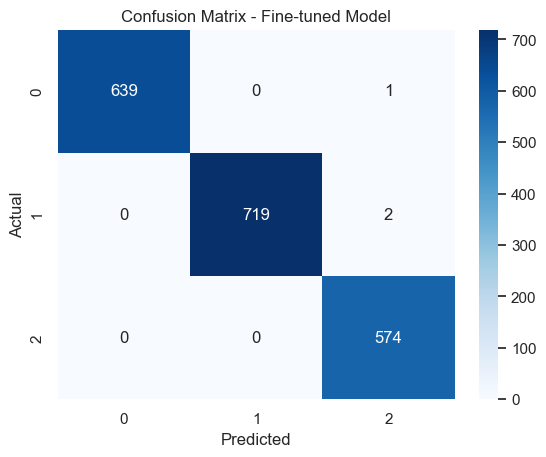

Fine-tuned Model Accuracy: 0.9984496124031008
Fine-tuned Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       640
           1       1.00      1.00      1.00       721
           2       0.99      1.00      1.00       574

    accuracy                           1.00      1935
   macro avg       1.00      1.00      1.00      1935
weighted avg       1.00      1.00      1.00      1935

Fine-tuned Model Classification Report Dictionary:
{'0': {'precision': 1.0, 'recall': 0.9984375, 'f1-score': 0.9992181391712275, 'support': 640}, '1': {'precision': 1.0, 'recall': 0.9972260748959778, 'f1-score': 0.9986111111111111, 'support': 721}, '2': {'precision': 0.9948006932409013, 'recall': 1.0, 'f1-score': 0.9973935708079931, 'support': 574}, 'accuracy': 0.9984496124031008, 'macro avg': {'precision': 0.9982668977469671, 'recall': 0.9985545249653259, 'f1-score': 0.9984076070301106, 'support': 1935}, 'weighted avg': {'prec

In [60]:
# Train the fine-tuned model
fine_tuned_model.fit(X_train_cnn, y_train_cnn, batch_size=32, epochs=5, validation_data=(X_test_cnn, y_test_cnn))

# Evaluate the fine-tuned model
y_pred_fine_tuned = fine_tuned_model.predict(X_test_cnn)
y_pred_fine_tuned = np.argmax(y_pred_fine_tuned, axis=1)

# Calculate accuracy
accuracy_fine_tuned = accuracy_score(np.argmax(y_test_cnn, axis=1), y_pred_fine_tuned)

# Generate classification report
classification_report_fine_tuned = classification_report(np.argmax(y_test_cnn, axis=1), y_pred_fine_tuned)
classification_report_fine_tuned_dict = classification_report(np.argmax(y_test_cnn, axis=1), y_pred_fine_tuned, output_dict=True)

# Confusion Matrix for fine-tuned model
conf_matrix_fine_tuned = confusion_matrix(np.argmax(y_test_cnn, axis=1), y_pred_fine_tuned)
sns.heatmap(conf_matrix_fine_tuned, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Fine-tuned Model')
plt.show()

# Display metrics
print('Fine-tuned Model Accuracy:', accuracy_fine_tuned)
print('Fine-tuned Model Classification Report:')
print(classification_report_fine_tuned)
print('Fine-tuned Model Classification Report Dictionary:')
print(classification_report_fine_tuned_dict)

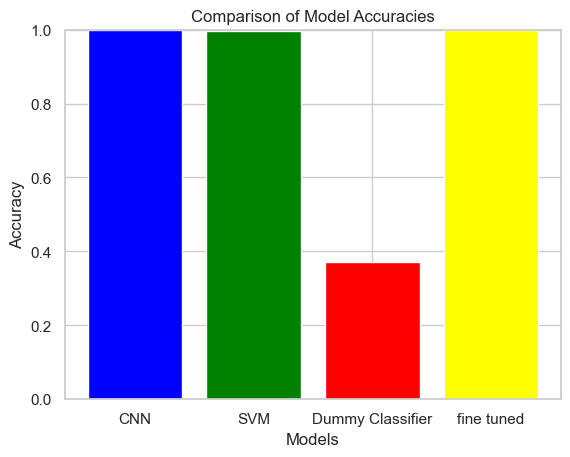

In [61]:
# Graph to compare accuracy of CNN, SVM,  Dummy Classifier and fine tuned
models = ['CNN', 'SVM', 'Dummy Classifier','fine tuned']
accuracies = [accuracy_cnn, accuracy_svm, accuracy_dummy, accuracy_fine_tuned]
colors = ['blue', 'green', 'red','yellow']

plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])
plt.show()

In [208]:
class_mapping = {
    0: 'MALIGNANT',
    2: 'BENIGN',
    1: 'BENIGN_WITHOUT_CALLBACK',
}

1/1 [==============================] - 0s 106ms/step


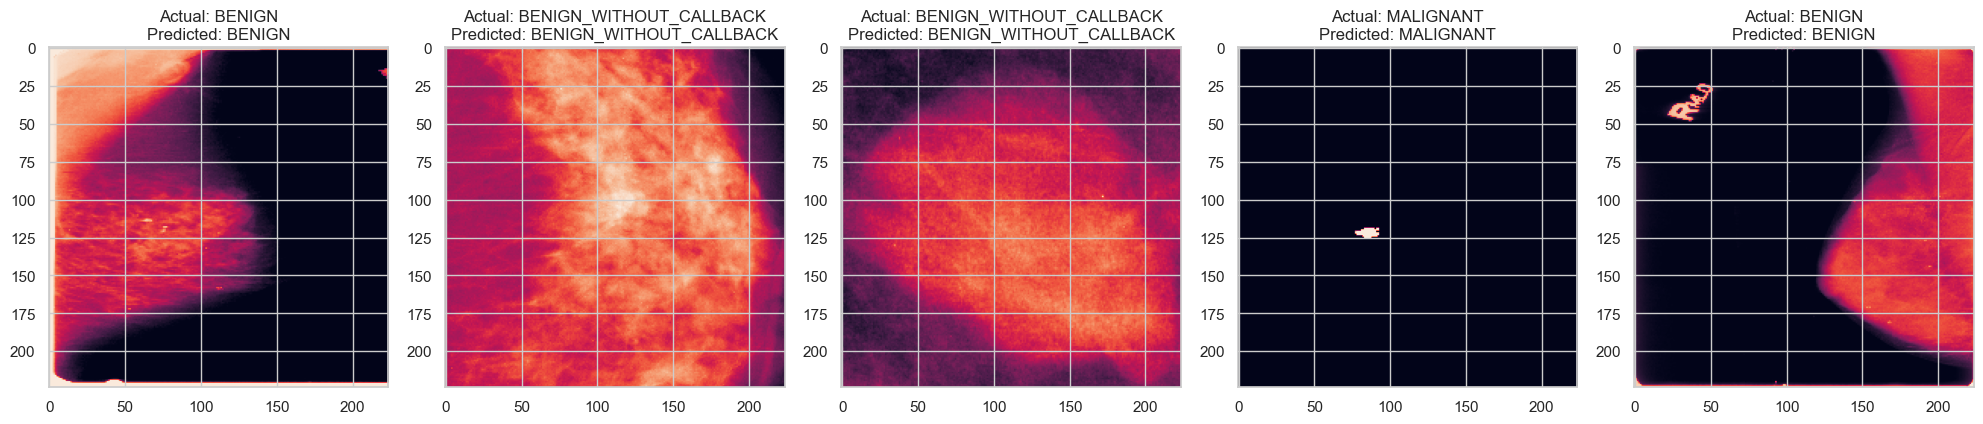

In [209]:
#CNN

# Number of images to display
num_images = 5

# Create a subplot with the specified number of columns and a wider layout
fig, axs = plt.subplots(1, num_images, figsize=(20, 4))

# Loop through the specified number of images
for i in range(num_images):
    # Get the image, actual label, and make a prediction
    image = X_test_cnn[i]
    actual_label = np.argmax(y_test_cnn[i])
    predicted_probabilities = model_cnn.predict(np.expand_dims(image, axis=0))[0]
    predicted_label_index = np.argmax(predicted_probabilities)

    # Map the numeric label to the actual class name
    if 'class_mapping' in locals():
        actual_class_name = class_mapping.get(actual_label, actual_label)
        predicted_class_name = class_mapping.get(predicted_label_index, predicted_label_index)
    else:
        actual_class_name = actual_label
        predicted_class_name = predicted_label_index

    # Display the image in the current subplot
    axs[i].imshow(image)
    axs[i].set_title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}")

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


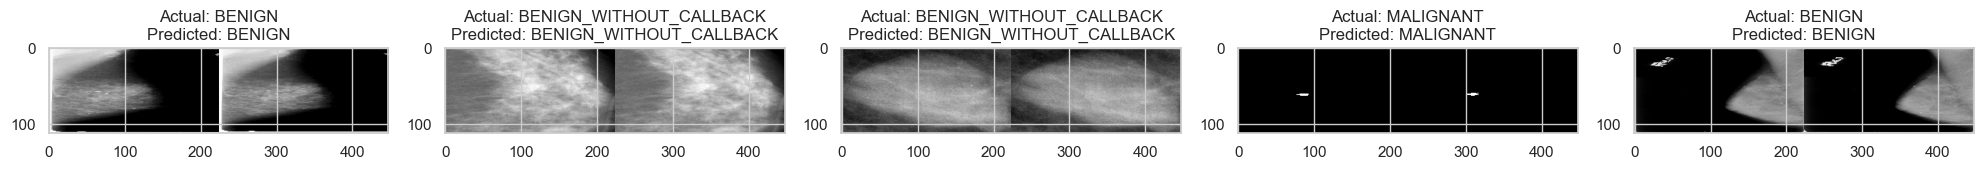

In [210]:
#SVM

# Number of images to display
num_images = 5

# Create a subplot with the specified number of columns
fig, axs = plt.subplots(1, num_images, figsize=(20, 4))

# Loop through the specified number of images
for i in range(num_images):
    # Get the flattened image, actual label, and make a prediction
    flattened_image = X_test_svm[i]
    actual_label = np.argmax(y_test_cnn[i])
    predicted_label = model_svm.predict(flattened_image.reshape(1, -1))

    # Infer dimensions from the flattened image size
    side_length = int(np.sqrt(len(flattened_image)))
    inferred_height = side_length // 2
    inferred_width = side_length * 2

    # Map the numeric label to the actual class name
    if 'class_mapping' in locals():
        actual_class_name = class_mapping.get(actual_label, actual_label)
        predicted_class_name = class_mapping.get(predicted_label[0], predicted_label[0])
    else:
        actual_class_name = actual_label
        predicted_class_name = predicted_label[0]

    # Display the flattened image in the current subplot
    axs[i].imshow(flattened_image.reshape((inferred_height, inferred_width)), cmap='gray')  
    # Adjust based on your original image shape
    axs[i].set_title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}")

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


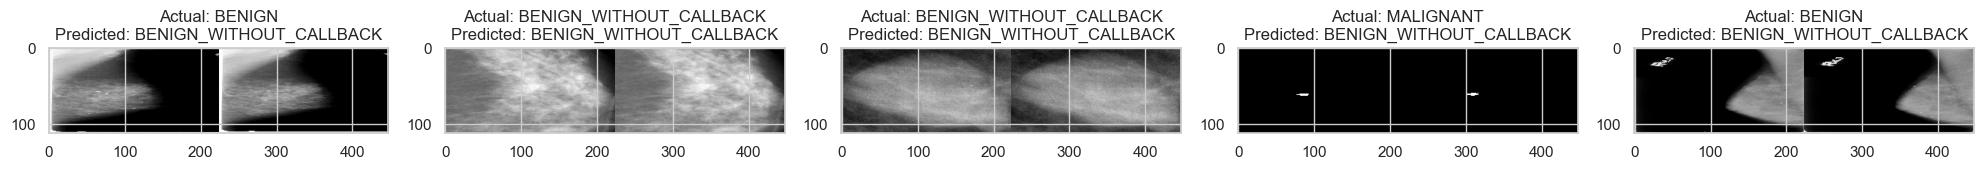

In [211]:
#DUMMY

# Number of images to display
num_images = 5

# Create a subplot with the specified number of columns
fig, axs = plt.subplots(1, num_images, figsize=(20, 4))

# Loop through the specified number of images
for i in range(num_images):
    # Get the flattened image, actual label, and make a prediction
    flattened_image = X_test_svm[i]
    actual_label = np.argmax(y_test_cnn[i])
    predicted_label = y_pred_dummy[i]

    # Infer dimensions from the flattened image size
    side_length = int(np.sqrt(len(flattened_image)))
    inferred_height = side_length // 2
    inferred_width = side_length * 2

    # Map the numeric label to the actual class name
    if 'class_mapping' in locals():
        actual_class_name = class_mapping.get(actual_label, actual_label)
        predicted_class_name = class_mapping.get(predicted_label, predicted_label)
    else:
        actual_class_name = actual_label
        predicted_class_name = predicted_label

    # Display the flattened image in the current subplot
    axs[i].imshow(flattened_image.reshape((inferred_height, inferred_width)), cmap='gray')  
    # Adjust based on your original image shape
    axs[i].set_title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}")

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 83ms/step


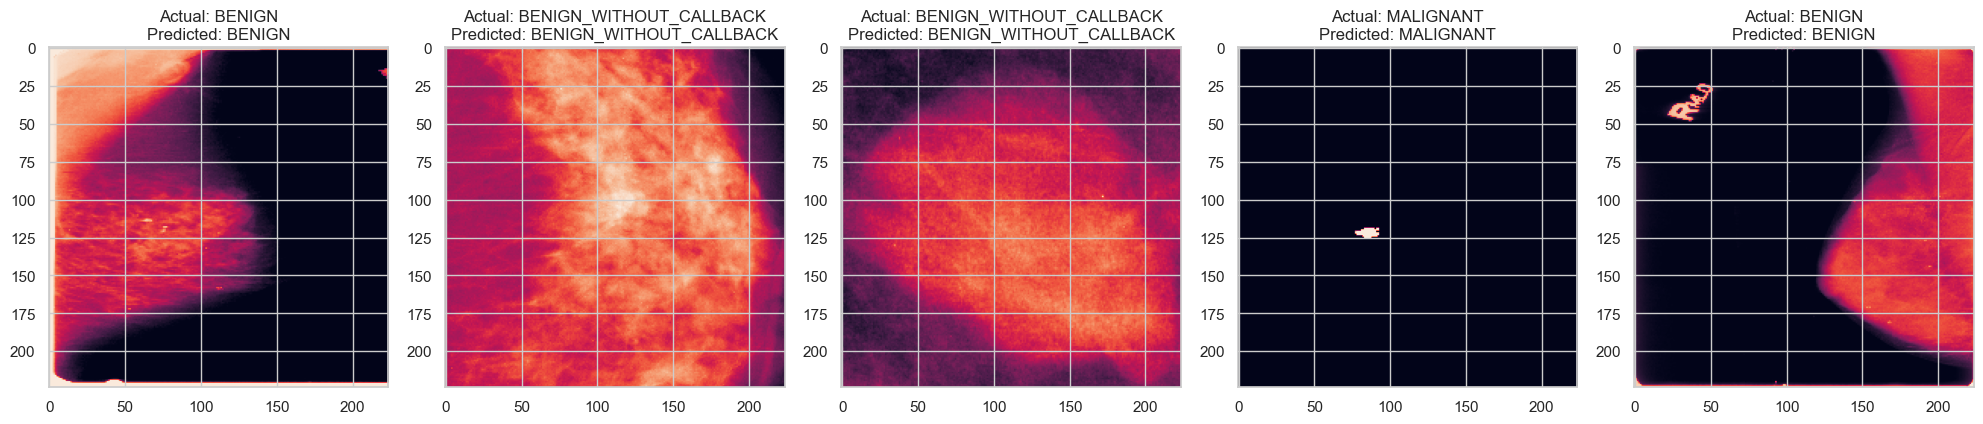

In [212]:
#FINE TUNED

# Number of images to display
num_images = 5

# Create a subplot with the specified number of columns
fig, axs = plt.subplots(1, num_images, figsize=(20, 4))

# Loop through the specified number of images
for i in range(num_images):
    # Get the image, actual label, and make a prediction
    image = X_test_cnn[i]
    actual_label = np.argmax(y_test_cnn[i])
    predicted_probabilities = fine_tuned_model.predict(np.expand_dims(image, axis=0))[0]
    predicted_label_index = np.argmax(predicted_probabilities)

    # Map the numeric label to the actual class name
    if 'class_mapping' in locals():
        actual_class_name = class_mapping.get(actual_label, actual_label)
        predicted_class_name = class_mapping.get(predicted_label_index, predicted_label_index)
    else:
        actual_class_name = actual_label
        predicted_class_name = predicted_label_index

    # Display the image in the current subplot
    axs[i].imshow(image)
    axs[i].set_title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}")

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


In [43]:
#ffeature selection(filter)chi-squared
# Load your mass training data
mass_train = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Data Science Tools\csv\mass_case_description_train_set.csv")

# Select relevant features (for demonstration purposes, considering only numerical columns)
numerical_features = mass_train.select_dtypes(include=['int64', 'float64']).columns

X = mass_train[numerical_features]
y = mass_train['pathology']  # Assuming 'pathology' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply chi-squared for feature selection
k_best = SelectKBest(score_func=chi2, k='all')  # Use k='all' to select all features
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Train a model on the selected features
k_best = SelectKBest(score_func=chi2, k='all')  # Use k='all' to select all features
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Train a model on the selected features
model = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

In [44]:
# Evaluate the model
print("Accuracy (chi-squared):", accuracy_chi2)
print("Actual Labels for 10 instances:")
print(y_test.values[:10])  # Show actual labels for the first 10 instances

print("Predicted Labels for 10 instances:")
print(y_pred[:10])  # Show predicted labels for the first 10 instances

Accuracy (chi-squared): 0.7386363636363636
Actual Labels for 10 instances:
['BENIGN' 'MALIGNANT' 'MALIGNANT' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK'
 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK' 'BENIGN']
Predicted Labels for 10 instances:
['BENIGN' 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK'
 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK' 'MALIGNANT']


In [45]:
#feauture selection (filter)using  mutual information
# Load your mass training data
mass_train = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Data Science Tools\csv\mass_case_description_train_set.csv")

# Select relevant features (for demonstration purposes, considering only numerical columns)
numerical_features = mass_train.select_dtypes(include=['int64', 'float64']).columns

X = mass_train[numerical_features]
y = mass_train['pathology']  # Assuming 'pathology' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply mutual information for feature selection
mutual_info_scores = mutual_info_classif(X_train, y_train)
feature_indices = sorted(range(len(mutual_info_scores)), key=lambda i: mutual_info_scores[i], reverse=True)
selected_features = X_train.columns[feature_indices[:5]]  # Selecting the top 5 features

X2_train_selected = X_train[selected_features]
X2_test_selected = X_test[selected_features]

# Train a model on the selected features
model = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility
model.fit(X2_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X2_test_selected)

In [46]:
# Evaluate the model
print("Accuracy (mutual information):", accuracy_mi)
print("Actual Labels for 10 instances:")
print(y_test.values[:10])  # Show actual labels for the first 10 instances

print("Predicted Labels for 10 instances:")
print(y_pred[:10])  # Show predicted labels for the first 10 instances

Accuracy (mutual information): 0.7424242424242424
Actual Labels for 10 instances:
['BENIGN' 'MALIGNANT' 'MALIGNANT' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK'
 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK' 'BENIGN']
Predicted Labels for 10 instances:
['BENIGN' 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK'
 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK' 'MALIGNANT']


In [47]:
# Load the mass dataset 
mass_train2 = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\SEMESTER 5\Data Science Tools\csv\mass_case_description_train_set.csv") 
 
# Separate the features (X) and the target variable (y) 
x2 = mass_train[numerical_features] 
y2 = mass_train2['pathology'] 
 
# Split the data into training and testing sets 
X_train2, X_test2, y_train2,y_test2= train_test_split(x2, y2, test_size=0.2, random_state=42) 
 
# Apply Recursive Feature Elimination (RFE) 
model_rfe = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility 
rfe = RFE(model_rfe, n_features_to_select=5)  # Selecting the top 5 features 
X_train_rfe_selected = rfe.fit_transform(X_train2,y_train2) 
X_test_rfe_selected = rfe.transform(X_test2) 
 
# Train a model on the selected features (RFE) 
model_rfe_selected = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility 
model_rfe_selected.fit(X_train_rfe_selected, y_train2) 
y_pred_rfe = model_rfe_selected.predict(X_test_rfe_selected) 

In [48]:
# Evaluate the model
print("Accuracy (RFE):", accuracy_rfe)
print("Actual Labels for 10 instances:")
print(y_test2.values[:10])  # Show actual labels for the first 10 instances

print("Predicted Labels for 10 instances:")
print(y_pred_rfe[:10])  # Show predicted labels for the first 10 instances

Accuracy (RFE): 0.7386363636363636
Actual Labels for 10 instances:
['BENIGN' 'MALIGNANT' 'MALIGNANT' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK'
 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK' 'BENIGN']
Predicted Labels for 10 instances:
['BENIGN' 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK'
 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK' 'MALIGNANT']


In [50]:
#print(selected_features)

Index(['assessment', 'subtlety', 'breast_density', 'abnormality id'], dtype='object')


In [51]:
# Assuming X_train2, y_train2, X_test2, and y_test2 are defined

# Apply Sequential Feature Selection (SFS)
model_sfs = RandomForestClassifier(random_state=42)
sfs = SequentialFeatureSelector(model_sfs, n_features_to_select=None, direction='forward')  # Set to None to select all features
X_train_sfs_selected = sfs.fit_transform(X_train2, y_train2)
X_test_sfs_selected = sfs.transform(X_test2)

# Train a model on the selected features (SFS)
model_sfs_selected = RandomForestClassifier(random_state=42)
model_sfs_selected.fit(X_train_sfs_selected, y_train2)
y_pred_sfs = model_sfs_selected.predict(X_test_sfs_selected)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\feature_selection\_sequential.py:206: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


In [52]:
# Evaluate the model
print("Accuracy (SFS):", accuracy_sfs)
print("Actual Labels for 10 instances:")
print(y_test2.values[:10])  # Show actual labels for the first 10 instances

print("Predicted Labels for 10 instances:")
print(y_pred_sfs[:10])  # Show predicted labels for the first 10 instances

Accuracy (SFS): 0.6931818181818182
Actual Labels for 10 instances:
['BENIGN' 'MALIGNANT' 'MALIGNANT' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK'
 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK' 'BENIGN']
Predicted Labels for 10 instances:
['BENIGN' 'MALIGNANT' 'MALIGNANT' 'MALIGNANT' 'BENIGN' 'MALIGNANT'
 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK' 'MALIGNANT']


In [53]:
# Apply PCA for dimensionality reduction
n_components = min(X_train_rfe_selected.shape[0], X_train_rfe_selected.shape[1]) - 1  # Adjusted to be within a valid range
pca_rfe = PCA(n_components=n_components)
X_train_rfe_pca = pca_rfe.fit_transform(X_train_rfe_selected)
X_test_rfe_pca = pca_rfe.transform(X_test_rfe_selected)

# Train a model on the reduced-dimension data
model_pca = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility
model_pca.fit(X_train_rfe_pca, y_train2)

# Make predictions on the test set
y_pred_pca = model_pca.predict(X_test_rfe_pca)

In [54]:
# Evaluate the RFE + PCA model
print("Accuracy (RFE + PCA):", accuracy_rfe_pca)
print("Actual Labels for 10 instances:")
print(y_test2.values[:10])  # Show actual labels for the first 10 instances

print("Predicted Labels for 10 instances:")
print(y_pred_pca[:10])  # Show predicted labels for the first 10 instances

Accuracy (RFE + PCA): 0.7424242424242424
Actual Labels for 10 instances:
['BENIGN' 'MALIGNANT' 'MALIGNANT' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK'
 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK' 'BENIGN']
Predicted Labels for 10 instances:
['BENIGN' 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK'
 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK' 'MALIGNANT']


In [55]:
# Apply PCA for dimensionality reduction
n_components = min(X2_train_selected.shape[0], X2_train_selected.shape[1])
pca = PCA(n_components=n_components)
X2_train_pca = pca.fit_transform(X2_train_selected)
X2_test_pca = pca.transform(X2_test_selected)

# Train a model on the reduced-dimension data
model = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility
model.fit(X2_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X2_test_pca)

In [56]:
# Evaluate the Mutual Information + PCA model
print("Accuracy (mutual information + PCA):", accuracy_mi_pca)
print("Actual Labels for 10 instances:")
print(y_test.values[:10])  # Show actual labels for the first 10 instances

print("Predicted Labels for 10 instances:")
print(y_pred[:10])  # Show predicted labels for the first 10 instances

Accuracy (mutual information + PCA): 0.7424242424242424
Actual Labels for 10 instances:
['BENIGN' 'MALIGNANT' 'MALIGNANT' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK'
 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK' 'BENIGN']
Predicted Labels for 10 instances:
['BENIGN' 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK'
 'MALIGNANT' 'BENIGN' 'MALIGNANT' 'BENIGN_WITHOUT_CALLBACK' 'MALIGNANT']


In [57]:
# Assuming X2_train_pca and X2_test_pca are the reduced-dimension datasets after PCA
# Assuming y_train and y_test are your target variables for classification

# Train a Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_rfe_pca, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_rfe_pca)

# Evaluate the model
accuracy_svm = accuracy_score(y_test2, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

# Print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Accuracy (SVM): 0.7462121212121212
Classification Report:
                         precision    recall  f1-score   support

                 BENIGN       0.70      0.74      0.72       112
BENIGN_WITHOUT_CALLBACK       1.00      0.52      0.69        23
              MALIGNANT       0.77      0.79      0.78       129

               accuracy                           0.75       264
              macro avg       0.82      0.68      0.73       264
           weighted avg       0.76      0.75      0.75       264



In [58]:
# Assuming X2_train_pca and X2_test_pca are the reduced-dimension datasets after PCA

# Train a k-NN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X2_train_pca, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X2_test_pca)

# Evaluate the k-NN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (k-NN):", accuracy_knn)
print(classification_report(y_test, y_pred_knn))

Accuracy (k-NN): 0.7196969696969697
                         precision    recall  f1-score   support

                 BENIGN       0.65      0.78      0.71       112
BENIGN_WITHOUT_CALLBACK       0.90      0.39      0.55        23
              MALIGNANT       0.78      0.73      0.75       129

               accuracy                           0.72       264
              macro avg       0.78      0.63      0.67       264
           weighted avg       0.74      0.72      0.72       264



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


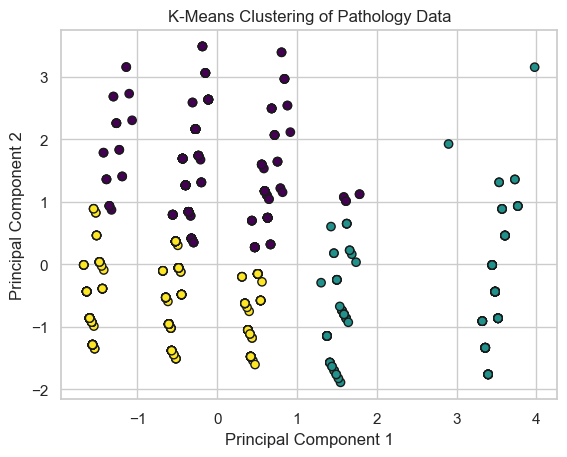

In [59]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X2_train_pca is the reduced-dimension dataset after PCA

# Choose the number of clusters (you may need to adjust this based on your data)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pathology_clusters = kmeans.fit_predict(X2_train_pca)

# Visualize the clusters (assuming 2D data after PCA)
plt.scatter(X2_train_pca[:, 0], X2_train_pca[:, 1], c=pathology_clusters, cmap='viridis', edgecolor='k')
plt.title('K-Means Clustering of Pathology Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
